In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [3]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [4]:
!kaggle datasets download -d nowke9/ipldata

  0% 0.00/1.20M [00:00<?, ?B/s]
100% 1.20M/1.20M [00:00<00:00, 19.6MB/s]


In [5]:
!ls

deliveries.csv	ipldata.zip  kaggle.json  matches.csv


In [6]:
!unzip \*.zip  && rm *.zip

Archive:  ipldata.zip
replace deliveries.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace matches.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')

In [8]:
data=pd.read_csv('deliveries.csv')
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [9]:
data2= pd.read_csv('matches.csv')
data2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [10]:
data_f = data2.loc[data2.team1.isin(['Kolkata Knight Riders','Rajasthan Royals'])] 
data_f = data_f.loc[data_f.team2.isin(['Kolkata Knight Riders','Rajasthan Royals'])] 
data_f

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
77,78,2008,Jaipur,2008-05-01,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,normal,0,Rajasthan Royals,45,0,SA Asnodkar,Sawai Mansingh Stadium,RE Koertzen,GA Pratapkumar,NaN
104,105,2008,Kolkata,2008-05-20,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,6,YK Pathan,Eden Gardens,BG Jerling,RE Koertzen,NaN
125,126,2009,Cape Town,2009-04-23,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,tie,0,Rajasthan Royals,0,0,YK Pathan,Newlands,MR Benson,M Erasmus,NaN
167,168,2009,Durban,2009-05-20,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,4,LR Shukla,Kingsmead,BG Jerling,SJA Taufel,NaN
186,187,2010,Ahmedabad,2010-03-20,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,normal,0,Rajasthan Royals,34,0,AA Jhunjhunwala,"Sardar Patel Stadium, Motera",RE Koertzen,RB Tiffin,NaN
226,227,2010,Kolkata,2010-04-17,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,normal,0,Kolkata Knight Riders,0,8,JD Unadkat,Eden Gardens,BG Jerling,RB Tiffin,NaN
245,246,2011,Jaipur,2011-04-15,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,9,G Gambhir,Sawai Mansingh Stadium,Aleem Dar,SS Hazare,NaN
250,251,2011,Kolkata,2011-04-17,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,8,L Balaji,Eden Gardens,Aleem Dar,RB Tiffin,NaN
313,314,2012,Jaipur,2012-04-08,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Rajasthan Royals,22,0,BJ Hodge,Sawai Mansingh Stadium,BF Bowden,VA Kulkarni,NaN
321,322,2012,Kolkata,2012-04-13,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,normal,0,Kolkata Knight Riders,0,5,Shakib Al Hasan,Eden Gardens,Asad Rauf,S Asnani,NaN


**Let's do Q1 now**

KKR Wins - 10
RR Wins - 10


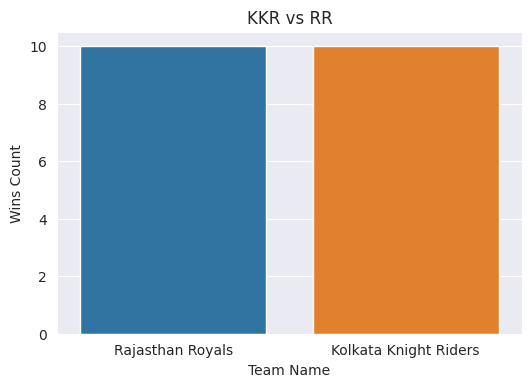

In [11]:
plt.figure(dpi=100)
sns.countplot(x='winner',data = data_f)
plt.ylabel('Wins Count')
plt.xlabel('Team Name')
plt.title('KKR vs RR')
A,B =data_f.winner.value_counts()

print('KKR Wins -',A)
print('RR Wins -',B)

plt.show()


Overall it's a good fight. They have won 10-10 each.

Let's find previous seasons record

In [12]:
data_f = data_f.loc[data_f.season.isin(['2018','2019'])] 

KKR Wins - 4
RR Wins - 1


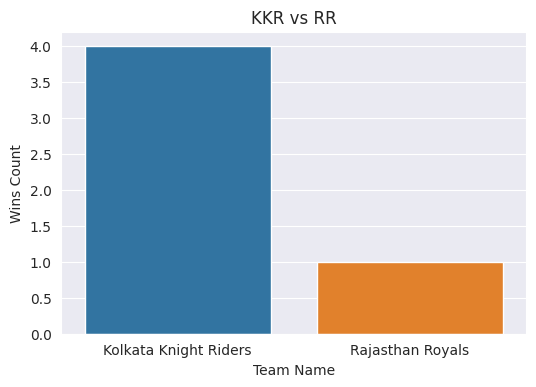

In [13]:
plt.figure(dpi=100)
sns.countplot(x='winner',data = data_f)
plt.ylabel('Wins Count')
plt.xlabel('Team Name')
plt.title('KKR vs RR')
A,B =data_f.winner.value_counts()

print('KKR Wins -',A)
print('RR Wins -',B)

plt.show()

Let's mark KKR considering our analysis.

**Let's do Q2 now**

**Let's find average wickets lost by both teams**

In [14]:
data_n = data.loc[data.bowling_team.isin(['Kolkata Knight Riders','Rajasthan Royals'])]
data_n = data_n.loc[data.batting_team.isin(['Kolkata Knight Riders','Rajasthan Royals'])]

In [15]:
data_n.player_dismissed.value_counts().sum() # Total wickets lost in RR v KKR contest

244

In [16]:
data_n.match_id.nunique()

20

In [17]:
np.round(244/20,2) # Average Wickets lost in RR v KKR contest

12.2

Let's mark 11-15 considering our analysis

**For Q3, Let's evaluate the given condition**

In [54]:
data_n.batsman.unique()

array(['GC Smith', 'SA Asnodkar', 'M Kaif', 'YK Pathan', 'SR Watson',
       'RA Jadeja', 'SK Warne', 'Sohail Tanvir', 'M Rawat', 'Salman Butt',
       'SC Ganguly', 'AB Agarkar', 'BJ Hodge', 'DJ Hussey', 'LR Shukla',
       'DB Das', 'WP Saha', 'Umar Gul', 'AB Dinda', 'I Sharma',
       'Mohammad Hafeez', 'PC Valthaty', 'RJ Quiney', 'AD Mascarenhas',
       'AS Raut', 'CH Gayle', 'BB McCullum', 'SB Bangar', 'Yashpal Singh',
       'NV Ojha', 'Niraj Patel', 'J Botha', 'T Henderson', 'MM Patel',
       'A Singh', 'SS Shaikh', 'MJ Lumb', 'FY Fazal', 'AA Jhunjhunwala',
       'AC Voges', 'P Dogra', 'MK Tiwary', 'CA Pujara', 'OA Shah',
       'AJ Finch', 'SK Trivedi', 'AG Paunikar', 'R Dravid', 'AL Menaria',
       'LRPL Taylor', 'MS Bisla', 'JH Kallis', 'G Gambhir', 'AM Rahane',
       'SW Tait', 'SP Goswami', 'KK Cooper', 'R Bhatia', 'B Lee',
       'SP Narine', 'Iqbal Abdulla', 'Shakib Al Hasan',
       'RN ten Doeschate', 'STR Binny', 'DH Yagnik', 'S Sreesanth',
       'EJG Morgan', 'M

In [55]:
data_b = data_n.loc[data.batsman.isin(['BA Stokes', 'JC Buttler','SV Samson','EJG Morgan','S Gill','SPD Smith','N Rana', 'KD Karthik','SP Narine'])]

In [72]:
data_ba = data_b.groupby(['batsman']).apply(lambda data_b:(data_b.batsman_runs.value_counts())).reset_index(name='Runs')
data_ba

,batsman,level_1,Runs
0,BA Stokes,1,26
1,BA Stokes,0,16
2,BA Stokes,2,3
3,BA Stokes,4,2
4,BA Stokes,6,1
5,EJG Morgan,0,17
6,EJG Morgan,1,12
7,EJG Morgan,6,3
8,EJG Morgan,4,3
9,EJG Morgan,2,3


In [73]:
data_ba.rename(columns = {'level_1':'Type_Run'}, inplace = True)

In [74]:
data_ba2 =  data_ba.loc[data_ba.Type_Run.isin(['4','6'])]
data_ba2

,batsman,Type_Run,Runs
3,BA Stokes,4,2
4,BA Stokes,6,1
7,EJG Morgan,6,3
8,EJG Morgan,4,3
13,JC Buttler,4,12
15,JC Buttler,6,3
18,KD Karthik,4,18
19,KD Karthik,6,14
23,N Rana,4,8
25,N Rana,6,2


In [75]:
data_ba3 =  data_ba.loc[data_ba.Type_Run.isin(['1','2','3'])]
data_ba3

,batsman,Type_Run,Runs
0,BA Stokes,1,26
2,BA Stokes,2,3
6,EJG Morgan,1,12
9,EJG Morgan,2,3
10,EJG Morgan,3,1
11,JC Buttler,1,29
14,JC Buttler,2,6
16,KD Karthik,1,59
20,KD Karthik,2,11
21,N Rana,1,35


In [76]:
data_ba2.rename(columns = {'Type_Run':'4_6'}, inplace = True) 
data_ba2.rename(columns = {'Runs':'Boundaries_Count'}, inplace = True) 
data_ba2

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,batsman,4_6,Boundaries_Count
3,BA Stokes,4,2
4,BA Stokes,6,1
7,EJG Morgan,6,3
8,EJG Morgan,4,3
13,JC Buttler,4,12
15,JC Buttler,6,3
18,KD Karthik,4,18
19,KD Karthik,6,14
23,N Rana,4,8
25,N Rana,6,2


In [77]:
data_ba3.rename(columns = {'Type_Run':'1_2_3'}, inplace = True) 
data_ba3.rename(columns = {'Runs':'Boundaries_Count'}, inplace = True) 
data_ba3

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,batsman,1_2_3,Boundaries_Count
0,BA Stokes,1,26
2,BA Stokes,2,3
6,EJG Morgan,1,12
9,EJG Morgan,2,3
10,EJG Morgan,3,1
11,JC Buttler,1,29
14,JC Buttler,2,6
16,KD Karthik,1,59
20,KD Karthik,2,11
21,N Rana,1,35


In [79]:
data_ba2['Boundary_Runs'] = data_ba2['4_6'] * data_ba2['Boundaries_Count']
data_ba2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,batsman,4_6,Boundaries_Count,Boundary_Runs
3,BA Stokes,4,2,8
4,BA Stokes,6,1,6
7,EJG Morgan,6,3,18
8,EJG Morgan,4,3,12
13,JC Buttler,4,12,48
15,JC Buttler,6,3,18
18,KD Karthik,4,18,72
19,KD Karthik,6,14,84
23,N Rana,4,8,32
25,N Rana,6,2,12


In [81]:
data_ba2.drop(['4_6','Boundaries_Count'], axis = 1)

,batsman,Boundary_Runs
3,BA Stokes,8
4,BA Stokes,6
7,EJG Morgan,18
8,EJG Morgan,12
13,JC Buttler,48
15,JC Buttler,18
18,KD Karthik,72
19,KD Karthik,84
23,N Rana,32
25,N Rana,12


In [82]:
data_ba4 = data_ba2.groupby(['batsman']).apply(lambda data_ba2:(data_ba2.Boundary_Runs.sum())).reset_index(name='Boundary_Runs')
data_ba4

,batsman,Boundary_Runs
0,BA Stokes,14
1,EJG Morgan,30
2,JC Buttler,66
3,KD Karthik,156
4,N Rana,44
5,S Gill,30
6,SP Narine,102
7,SPD Smith,50
8,SV Samson,100


In [83]:
data_ba3['1_2_3_Runs'] = data_ba3['1_2_3'] * data_ba3['Boundaries_Count']
data_ba3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,batsman,1_2_3,Boundaries_Count,1_2_3_Runs
0,BA Stokes,1,26,26
2,BA Stokes,2,3,6
6,EJG Morgan,1,12,12
9,EJG Morgan,2,3,6
10,EJG Morgan,3,1,3
11,JC Buttler,1,29,29
14,JC Buttler,2,6,12
16,KD Karthik,1,59,59
20,KD Karthik,2,11,22
21,N Rana,1,35,35


In [84]:
data_ba3.drop(['1_2_3','Boundaries_Count'], axis = 1)

,batsman,1_2_3_Runs
0,BA Stokes,26
2,BA Stokes,6
6,EJG Morgan,12
9,EJG Morgan,6
10,EJG Morgan,3
11,JC Buttler,29
14,JC Buttler,12
16,KD Karthik,59
20,KD Karthik,22
21,N Rana,35


In [87]:
data_ba5 = data_ba3.groupby(['batsman']).apply(lambda data_ba3:(data_ba3['1_2_3_Runs'].sum())).reset_index(name='1_2_3_Runs')
data_ba5

,batsman,1_2_3_Runs
0,BA Stokes,32
1,EJG Morgan,21
2,JC Buttler,41
3,KD Karthik,81
4,N Rana,43
5,S Gill,23
6,SP Narine,25
7,SPD Smith,72
8,SV Samson,96


In [88]:
data_bar= data_ba4.join(data_ba5['1_2_3_Runs'])
data_bar

,batsman,Boundary_Runs,1_2_3_Runs
0,BA Stokes,14,32
1,EJG Morgan,30,21
2,JC Buttler,66,41
3,KD Karthik,156,81
4,N Rana,44,43
5,S Gill,30,23
6,SP Narine,102,25
7,SPD Smith,50,72
8,SV Samson,100,96


In [91]:
data_ba6 = data_b.groupby(['batsman']).apply(lambda data_b:(data_b.batsman_runs.sum())).reset_index(name='Total_Runs')
data_ba6

,batsman,Total_Runs
0,BA Stokes,46
1,EJG Morgan,51
2,JC Buttler,107
3,KD Karthik,237
4,N Rana,87
5,S Gill,53
6,SP Narine,127
7,SPD Smith,122
8,SV Samson,196


In [92]:
data_barf= data_bar.join(data_ba6['Total_Runs'])
data_barf

,batsman,Boundary_Runs,1_2_3_Runs,Total_Runs
0,BA Stokes,14,32,46
1,EJG Morgan,30,21,51
2,JC Buttler,66,41,107
3,KD Karthik,156,81,237
4,N Rana,44,43,87
5,S Gill,30,23,53
6,SP Narine,102,25,127
7,SPD Smith,50,72,122
8,SV Samson,100,96,196


This is our desired result.
Now let's use the given condition

In [93]:
data_barf['Question_Metric'] = (data_barf['Boundary_Runs'] - data_barf['1_2_3_Runs']) / data_barf['Total_Runs']
data_barf

,batsman,Boundary_Runs,1_2_3_Runs,Total_Runs,Question_Metric
0,BA Stokes,14,32,46,-0.391304
1,EJG Morgan,30,21,51,0.176471
2,JC Buttler,66,41,107,0.233645
3,KD Karthik,156,81,237,0.316456
4,N Rana,44,43,87,0.011494
5,S Gill,30,23,53,0.132075
6,SP Narine,102,25,127,0.606299
7,SPD Smith,50,72,122,-0.180328
8,SV Samson,100,96,196,0.020408


Clearly we have got highest ratio for Karthik and Narine and both are not in option.

Therefore let's mark others.

**Let's do Q4**

**Let's find Archer's Economy rate**

In [22]:
data_ja =  data.loc[data.bowling_team.isin(['Rajasthan Royals'])]
data_ja = data_ja.loc[data_ja.batting_team.isin(['Kolkata Knight Riders'])]
data_ja = data_ja.loc[data_ja.bowler.isin(['J Archer'])]

In [23]:
data_jae = data_ja.groupby(['match_id','bowler']).apply(lambda data_ja:(data_ja.total_runs.sum())).reset_index(name='Runs_Given')
data_jae

,match_id,bowler,Runs_Given
0,7942,J Archer,43
1,7951,J Archer,37
2,11312,J Archer,16
3,11334,J Archer,29


In [24]:
data_jae2 = data_ja.groupby(['match_id','bowler']).apply(lambda data_ja:(data_ja.over.value_counts().sum())).reset_index(name='Balls_bowled')
data_jae2

,match_id,bowler,Balls_bowled
0,7942,J Archer,24
1,7951,J Archer,28
2,11312,J Archer,18
3,11334,J Archer,25


In [25]:
data_jar = data_jae.join(data_jae2['Balls_bowled'])
data_jar

,match_id,bowler,Runs_Given,Balls_bowled
0,7942,J Archer,43,24
1,7951,J Archer,37,28
2,11312,J Archer,16,18
3,11334,J Archer,29,25


In [26]:
data_jar['Economy_rate'] =( data_jar['Runs_Given'] / data_jar['Balls_bowled']) * 6
data_jar

,match_id,bowler,Runs_Given,Balls_bowled,Economy_rate
0,7942,J Archer,43,24,10.750000
1,7951,J Archer,37,28,7.928571
2,11312,J Archer,16,18,5.333333
3,11334,J Archer,29,25,6.960000


In [27]:
data_jar['Economy_rate'].mean()

7.74297619047619

In [28]:
data_jar['Economy_rate'].median()

7.444285714285714

Well let's go with median as it sense more here

Therefore mark option less than 7.5.

Now let's find boundaries

In [34]:
data_ja.total_runs.value_counts()

0    45
1    25
4     9
6     8
2     8
Name: total_runs, dtype: int64

Let's mark option 1 considering our analysis

**Let's do Q5 now**

**Let's find economy rate for all**

In [35]:
data_er = data_n.groupby(['match_id','bowler']).apply(lambda data_n:(data_n.total_runs.sum())).reset_index(name='Runs_Given')
data_er

,match_id,bowler,Runs_Given
0,78,AB Agarkar,46
1,78,AB Dinda,30
2,78,DJ Hussey,26
3,78,I Sharma,28
4,78,LR Shukla,16
...,...,...,...
236,11334,PP Chawla,20
237,11334,R Parag,7
238,11334,S Gopal,33
239,11334,SP Narine,25


In [36]:
data_er2 = data_n.groupby(['match_id','bowler']).apply(lambda data_n:(data_n.over.value_counts().sum())).reset_index(name='Balls_bowled')
data_er2

,match_id,bowler,Balls_bowled
0,78,AB Agarkar,24
1,78,AB Dinda,26
2,78,DJ Hussey,12
3,78,I Sharma,25
4,78,LR Shukla,7
...,...,...,...
236,11334,PP Chawla,24
237,11334,R Parag,6
238,11334,S Gopal,18
239,11334,SP Narine,24


In [38]:
data_e = data_er.join(data_er2['Balls_bowled'])
data_e

,match_id,bowler,Runs_Given,Balls_bowled
0,78,AB Agarkar,46,24
1,78,AB Dinda,30,26
2,78,DJ Hussey,26,12
3,78,I Sharma,28,25
4,78,LR Shukla,16,7
...,...,...,...,...
236,11334,PP Chawla,20,24
237,11334,R Parag,7,6
238,11334,S Gopal,33,18
239,11334,SP Narine,25,24


In [39]:
data_e['Economy_rate'] =( data_e['Runs_Given'] / data_e['Balls_bowled']) * 6
data_e

,match_id,bowler,Runs_Given,Balls_bowled,Economy_rate
0,78,AB Agarkar,46,24,11.500000
1,78,AB Dinda,30,26,6.923077
2,78,DJ Hussey,26,12,13.000000
3,78,I Sharma,28,25,6.720000
4,78,LR Shukla,16,7,13.714286
...,...,...,...,...,...
236,11334,PP Chawla,20,24,5.000000
237,11334,R Parag,7,6,7.000000
238,11334,S Gopal,33,18,11.000000
239,11334,SP Narine,25,24,6.250000


In [46]:
data_e = data_e[data_e.Balls_bowled >6] # Max 1 over condition

In [47]:
data_e = data_e[data_e.Economy_rate < 8] # Economy rate should be less than 8

In [48]:
data_e.head()

,match_id,bowler,Runs_Given,Balls_bowled,Economy_rate
1,78,AB Dinda,30,26,6.923077
3,78,I Sharma,28,25,6.720000
5,78,MM Patel,30,24,7.500000
7,78,SK Trivedi,31,26,7.153846
9,78,SR Watson,23,21,6.571429


In [52]:
data_e.Economy_rate.value_counts().sum() # No of bowlers with less than economy rate of 8 in KKR v RR contest

137

In [50]:
data_e.match_id.nunique()

20

In [53]:
np.round(137/20,2) # Average bowler per match with Economy of less than 8

6.85

Let's mark 6 or more considering our analysis

Thank You again for this amazing internship.

Looking forward to it tomorrow.

Regards,

Ashaab Rizvi

